# Introduction

![Tren Trasandino](https://images.unsplash.com/photo-1504038154755-752b537dddd0?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1053&q=80)


Construction is one of the [key sectors in Ecuadorian economy](https://www.revistagestion.ec/economia-y-finanzas-analisis/la-construccion-un-pilar-de-la-economia-debilitado-por-la-pandemia). But what can we learn from construction data? The purpose of this analysis is to understand the construction sector in Ecuador through data in the year 2012.

I'll search for insights such as:

* The provinces with greater number of constructions and spending.
* The cantons with greater number of constructions.
* Features about buildings such as most common number of floors, rooms, land area, construction area and spending.
* The most expensive type of structure.
* Differences in cost between public and private properties. 

Data is provided by INEC and can be found at this link: http://catalogo.datosabiertos.gob.ec/dataset/esta

Data is about building permits. Thus, some buildings may not have been carried out.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/work/data/df_cleaned.csv')
df

,desprovin,descodcantf,mes,desmes,año,desaño,nubo,fper,despropie,destipbr,...,CDISPUSO,DESCDISPUSO,CDISPARC,DESCDISPARC,DESCDISPRFI,CDISPRFX,DESCDISPRFX,CNUVICAL,CVAE,DESCAREAUR
0,GUAYAS,DAULE,9,SEPTIEMBRE,3,2012,27,2012-09-20,Privada,Nueva Construcción,...,3,Tres o Más Familias,6,( >=500 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,57,1125040,Urbana
1,MORONA SANTIAGO,MORONA,6,JUNIO,3,2012,11,2012-06-08,Privada,Ampliación hacia arriba,...,4,Comercial,1,( < 100 M2 ),Recursos Propios Personales,1,Recursos Propios Personales,0,6500,Urbana
2,NAPO,TENA,8,AGOSTO,3,2012,9,2012-08-23,Pública,Nueva Construcción,...,14,Otras,1,( < 100 M2 ),"Recursos Propios gobierno central, provincial,...",5,"Recursos Propios gobierno central, provincial,...",0,14400,Urbana
3,GUAYAS,DAULE,7,JULIO,3,2012,2,2012-07-03,Privada,Nueva Construcción,...,9,Recreación Deporte,3,( >=200 M2 Y <300 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,0,102628,Urbana
4,PICHINCHA,QUITO,12,DICIEMBRE,3,2012,5,2012-12-17,Privada,Nueva Construcción,...,4,Comercial,6,( >=500 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,0,600000,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29045,GUAYAS,DAULE,5,MAYO,3,2012,30,2012-05-24,Privada,Nueva Construcción,...,2,Dos Familias,3,( >=200 M2 Y <300 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,2,71204,Urbana
29046,CAÑAR,LA TRONCAL,11,NOVIEMBRE,3,2012,1,2012-11-05,Privada,Nueva Construcción,...,1,Una Familia,2,( >=100 M2 Y <200 M2),Recursos Propios Personales,1,Recursos Propios Personales,1,39158,Urbana
29047,GUAYAS,DAULE,2,FEBRERO,3,2012,44,2012-02-22,Privada,Nueva Construcción,...,2,Dos Familias,3,( >=200 M2 Y <300 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,2,81137,Urbana
29048,GUAYAS,DAULE,2,FEBRERO,3,2012,45,2012-02-23,Privada,Nueva Construcción,...,2,Dos Familias,2,( >=100 M2 Y <200 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,2,58270,Urbana


In [ ]:
df.dtypes

desprovin       object
descodcantf     object
mes              int64
desmes          object
año              int64
desaño           int64
nubo             int64
fper            object
despropie       object
destipbr        object
sute           float64
arpb             int64
arco             int64
aesv             int64
descimi         object
desestru        object
despared        object
descubi         object
descres         object
numuni         float64
nuvi             int64
nucu             int64
nudo             int64
nupi             int64
ares             int64
tonp             int64
aret             int64
valt             int64
vtou             int64
vted             int64
NUPIRES          int64
NUVICAL          int64
NUDOCAL          int64
NUCUCAL          int64
CARCO            int64
CARES            int64
CARNRES          int64
CARDPAR          int64
CAESV            int64
CSUTE            int64
CTIPOBR          int64
DESCTIPOBR      object
CPERM            int64
CDISPSUT   

In [ ]:
df['fper'] = pd.to_datetime(df['fper'])
df['despropie'] = df['despropie'].astype('category')
df['destipbr'] = df['destipbr'].astype('category')
df['descimi'] = df['descimi'].astype('category')

df['desestru'] = df['desestru'].astype('category')
df['despared'] = df['despared'].astype('category')
df['descubi'] = df['descubi'].astype('category')
df['descres'] = df['descres'].astype('category')

df['DESCTIPOBR'] = df['DESCTIPOBR'].astype('category')
df['DESCDISPSUT'] = df['DESCDISPSUT'].astype('category')
df['DESCDISPUSO'] = df['DESCDISPUSO'].astype('category')
df['DESCDISPARC'] = df['DESCDISPARC'].astype('category')
df['DESCDISPRFI'] = df['DESCDISPRFI'].astype('category')
df['DESCDISPRFX'] = df['DESCDISPRFX'].astype('category')
df['DESCAREAUR'] = df['DESCAREAUR'].astype('category')

In [ ]:
df.dtypes

desprovin              object
descodcantf            object
mes                     int64
desmes                 object
año                     int64
desaño                  int64
nubo                    int64
fper           datetime64[ns]
despropie            category
destipbr             category
sute                  float64
arpb                    int64
arco                    int64
aesv                    int64
descimi              category
desestru             category
despared             category
descubi              category
descres              category
numuni                float64
nuvi                    int64
nucu                    int64
nudo                    int64
nupi                    int64
ares                    int64
tonp                    int64
aret                    int64
valt                    int64
vtou                    int64
vted                    int64
NUPIRES                 int64
NUVICAL                 int64
NUDOCAL                 int64
NUCUCAL   

In [ ]:
df['DESCAREAUR'].unique()

array(['Urbana', 'Rural'], dtype=object)

# Data Analysis

Once I've cleaned and processed the data I'm going to analyze it and extract insightful features. You'll notice that dataset has numerical and categorical variables. This section divides in univariate analysis, bivariate analysis and multivariate analysis, for both types of variables.

## Univariate Analysis

Here I'll focus on one variable descriptive statistics using numerical (median, quartils, etc.) and visual resources such as barplots and pie charts. I won't use distribution plots or histograms since there are too many outliers and the plots won't make sense. That's why I resume the information in tables instead.

In [ ]:
sns.set_theme()

<AxesSubplot:xlabel='count', ylabel='desprovin'>

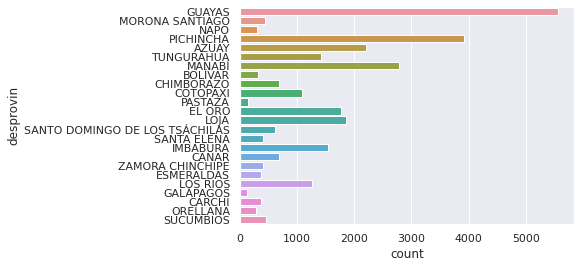

In [ ]:
sns.countplot(y='desprovin', data=df)

In [ ]:
df.groupby(['desprovin'])[['descodcantf']].count().sort_values(by='descodcantf', ascending=False)

,descodcantf
desprovin,
GUAYAS,5565
PICHINCHA,3912
MANABÍ,2780
AZUAY,2214
LOJA,1858
EL ORO,1763
IMBABURA,1545
TUNGURAHUA,1427
LOS RIOS,1262


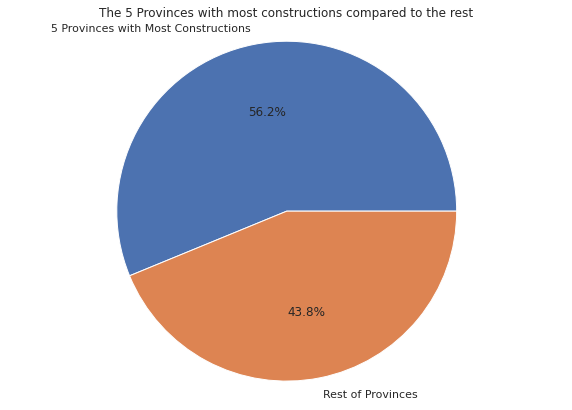

In [ ]:
df_5_provinces = df.groupby(['desprovin'])[['descodcantf']].count().sort_values(by='descodcantf', ascending=False).head(5).sum()
df_rest_provinces = df.groupby(['desprovin'])[['descodcantf']].count().sort_values(by='descodcantf', ascending=False)[5:].sum()

sizes_pie = [float(df_5_provinces), float(df_rest_provinces)]
labels_pie = ['5 Provinces with Most Constructions', 'Rest of Provinces']

fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%')
ax.axis('equal')
plt.title('The 5 Provinces with most constructions compared to the rest')
plt.show() 

In [ ]:
df.groupby(['descodcantf'])[['desmes']].count().sort_values(by='desmes', ascending=False)

,desmes
descodcantf,
QUITO,3047
GUAYAQUIL,2789
CUENCA,1763
LOJA,1410
AMBATO,1058
...,...
TIWINTZA,4
CARLOS JULIO AROSEMENA TO,3
OÑA,3


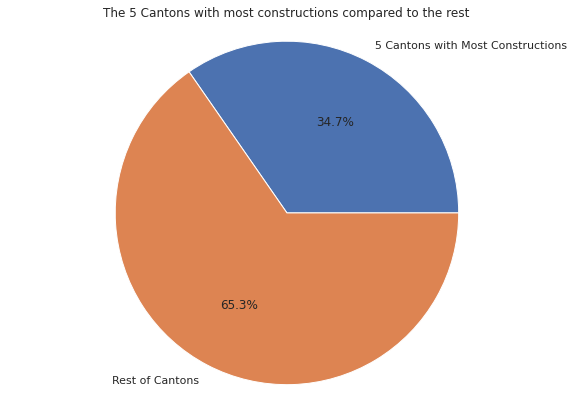

In [ ]:
df_5_cantons = df.groupby(['descodcantf'])[['desmes']].count().sort_values(by='desmes', ascending=False).head(5).sum()
df_rest_cantons = df.groupby(['descodcantf'])[['desmes']].count().sort_values(by='desmes', ascending=False)[5:].sum()

sizes_pie = [float(df_5_cantons), float(df_rest_cantons)]
labels_pie = ['5 Cantons with Most Constructions', 'Rest of Cantons']

fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%')
ax.axis('equal')
plt.title('The 5 Cantons with most constructions compared to the rest')
plt.show() 

In [ ]:
df.groupby(['desprovin'])[['CVAE']].sum().sort_values(by='CVAE', ascending=False)

,CVAE
desprovin,
PICHINCHA,1461900941
GUAYAS,596869090
AZUAY,191503547
IMBABURA,121497127
MANABÍ,117266103
TUNGURAHUA,99516908
LOJA,94809385
EL ORO,59172350
COTOPAXI,47226785


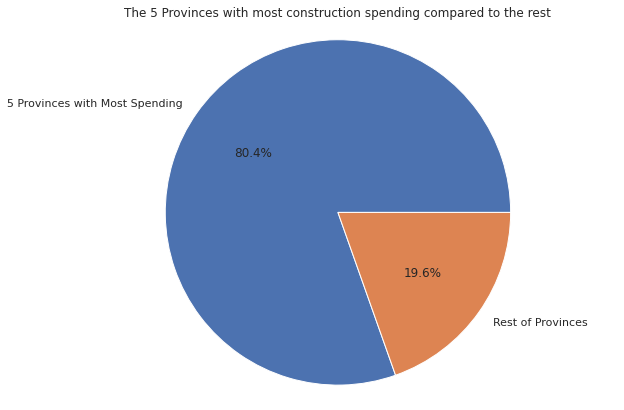

In [ ]:
df_5_provinces_cost = df.groupby(['desprovin'])[['CVAE']].sum().sort_values(by='CVAE', ascending=False).head(5).sum()
df_rest_provinces_cost = df.groupby(['desprovin'])[['CVAE']].sum().sort_values(by='CVAE', ascending=False)[5:].sum()

sizes_pie = [float(df_5_provinces_cost), float(df_rest_provinces_cost)]
labels_pie = ['5 Provinces with Most Spending', 'Rest of Provinces']

fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%')
ax.axis('equal')
plt.title('The 5 Provinces with most construction spending compared to the rest')
plt.show() 

In [ ]:
df.groupby(['descodcantf'])[['CVAE']].sum().sort_values(by='CVAE', ascending=False)

,CVAE
descodcantf,
QUITO,1396074117
GUAYAQUIL,289116520
CUENCA,171324263
DAULE,170463687
AMBATO,82394980
...,...
PALENQUE,90750
ECHEANDIA,87100
PABLO VI,85500


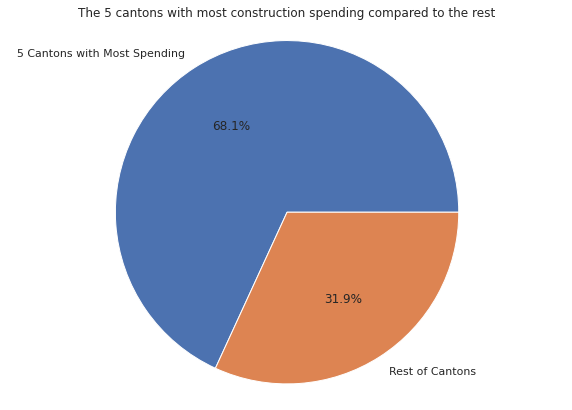

In [ ]:
df_5_cantons_cost = df.groupby(['descodcantf'])[['CVAE']].sum().sort_values(by='CVAE', ascending=False).head(5).sum()
df_rest_cantons_cost = df.groupby(['descodcantf'])[['CVAE']].sum().sort_values(by='CVAE', ascending=False)[5:].sum()

sizes_pie = [float(df_5_cantons_cost), float(df_rest_cantons_cost)]
labels_pie = ['5 Cantons with Most Spending', 'Rest of Cantons']

fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(sizes_pie, labels=labels_pie, autopct='%1.1f%%')
ax.axis('equal')
plt.title('The 5 cantons with most construction spending compared to the rest')
plt.show() 

We can see that 56.2% of constructions concentrate in just 5 provinces. On the other hand, the  34.7% of constructions concentrate in 5 cantons.

This is a great reduction and tell us that there are provinces in which constructions do not concentrate just in one canton, but they are scattered throughout the province. 

The total cost of construction is enormously conscentrated in 5 provinces with 80.4%. The top 5 cantons concentrate the 68.1%.

The 3 provinces that appear the most both at amout of constructions and total cost of constructions are Pichincha, Guayas and Azuay. Furthermore, their canton capitals appear when we consider cantons only. 

**Up to this point, we can say that Pichincha, Guayas and Azuay are fundamental in construction industry in Ecuador.**


In [ ]:
df_date_index = df.set_index('fper')

In [ ]:
df_date_index['Quarter'] = df_date_index.index.quarter
df_date_index['Month'] = df_date_index.index.month
df_date_index['Day'] = df_date_index.index.weekday

In [ ]:
df_date_index

,desprovin,descodcantf,mes,desmes,año,desaño,nubo,despropie,destipbr,sute,...,DESCDISPARC,DESCDISPRFI,CDISPRFX,DESCDISPRFX,CNUVICAL,CVAE,DESCAREAUR,Quarter,Month,Day
fper,,,,,,,,,,,,,,,,,,,,,
2012-09-20,GUAYAS,DAULE,9,SEPTIEMBRE,3,2012,27,Privada,Nueva Construcción,3501.0,...,( >=500 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,57,1125040,Urbana,3,9,3
2012-06-08,MORONA SANTIAGO,MORONA,6,JUNIO,3,2012,11,Privada,Ampliación hacia arriba,0.0,...,( < 100 M2 ),Recursos Propios Personales,1,Recursos Propios Personales,0,6500,Urbana,2,6,4
2012-08-23,NAPO,TENA,8,AGOSTO,3,2012,9,Pública,Nueva Construcción,10000.0,...,( < 100 M2 ),"Recursos Propios gobierno central, provincial,...",5,"Recursos Propios gobierno central, provincial,...",0,14400,Urbana,3,8,3
2012-07-03,GUAYAS,DAULE,7,JULIO,3,2012,2,Privada,Nueva Construcción,34739.0,...,( >=200 M2 Y <300 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,0,102628,Urbana,3,7,1
2012-12-17,PICHINCHA,QUITO,12,DICIEMBRE,3,2012,5,Privada,Nueva Construcción,10000.0,...,( >=500 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,0,600000,Rural,4,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-05-24,GUAYAS,DAULE,5,MAYO,3,2012,30,Privada,Nueva Construcción,232.0,...,( >=200 M2 Y <300 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,2,71204,Urbana,2,5,3
2012-11-05,CAÑAR,LA TRONCAL,11,NOVIEMBRE,3,2012,1,Privada,Nueva Construcción,145.0,...,( >=100 M2 Y <200 M2),Recursos Propios Personales,1,Recursos Propios Personales,1,39158,Urbana,4,11,0
2012-02-22,GUAYAS,DAULE,2,FEBRERO,3,2012,44,Privada,Nueva Construcción,360.0,...,( >=200 M2 Y <300 M2),Recursos Propios de Empresas y Constructoras P...,2,Recursos Propios de Empresas y Constructoras P...,2,81137,Urbana,1,2,2


<AxesSubplot:xlabel='Quarter'>

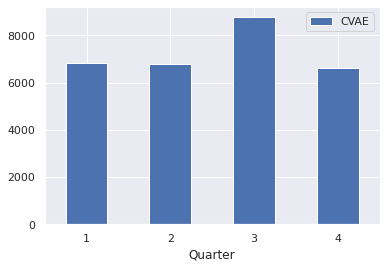

In [ ]:
df_date_index.groupby('Quarter')[['CVAE']].count().plot.bar(rot=0)

<AxesSubplot:xlabel='Quarter'>

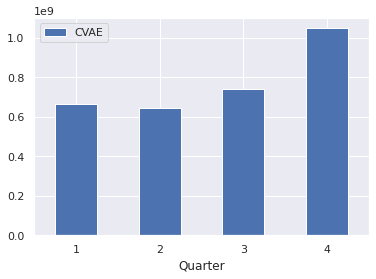

In [ ]:
df_date_index.groupby('Quarter')[['CVAE']].sum().plot.bar(rot=0)

<AxesSubplot:xlabel='Month'>

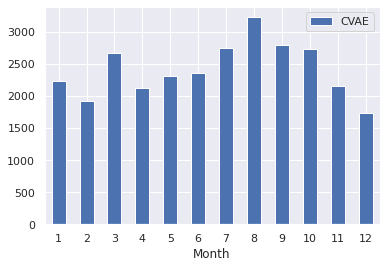

In [ ]:
df_date_index.groupby('Month')[['CVAE']].count().plot.bar(rot=0)

<AxesSubplot:xlabel='Month'>

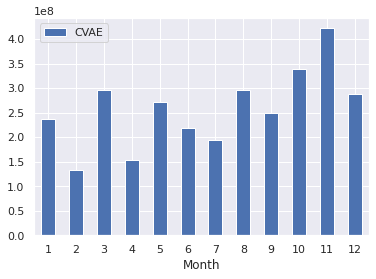

In [ ]:
df_date_index.groupby('Month')[['CVAE']].sum().plot.bar(rot=0)

Analyzing the dates, we found out that the amount of constructions where similar in the 1st, 2nd and 4th quarter. But 3rd quarter was significantly different.

Now, the construction spending tends to be greater as the year comes to an end. That's why in 3rd and 4th quarters there is more spending. 



<AxesSubplot:xlabel='count', ylabel='despropie'>

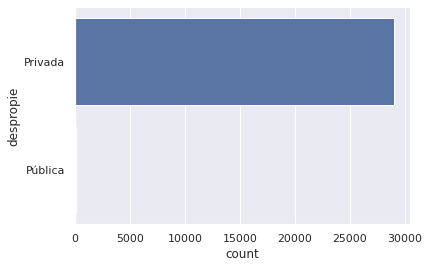

In [ ]:
sns.countplot(y='despropie', data=df_date_index)

We see that public constructions are insignificant compared to private ones. But let's see whether it's true by analyzing the spending.

<AxesSubplot:xlabel='despropie'>

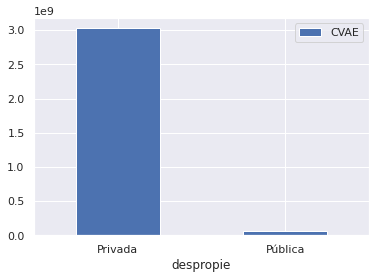

In [ ]:
df_date_index.groupby('despropie')[['CVAE']].sum().plot.bar(rot=0)

We see that private construction spending is much greater than public spending. But, it's interesting to analyze the cost per m² and the type of construction as well as the type of structure. So, a new question is are public constructions more expensive than private ones?

I'll answer that question later.

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df_date_index.groupby(['despropie', 'DESCDISPUSO'])[['CVAE']].median()

CVAE
despropie DESCDISPUSO                                    
Privada   Comercial                             52,390.00
          Cultura                               85,000.00
          Dos Familias                          55,839.00
          Edificio Administrativo              110,200.00
          Educación                            139,867.50
          Hospitales Clínicas Estab de Salud   150,000.00
          Iglesias - Templos - Afines           50,000.00
          Industrial                            95,300.00
          Mixto Residencial y No Residencial    60,000.00
          Otras                                 25,175.00
          Recreación Deporte                    84,690.00
          Transporte y Comunicaciones           19,800.00
          Tres o Más Familias                  110,000.00
          Una Familia                           24,630.00
Pública   Comercial                          1,000,000.00
          Cultura                              326,801.00
          Dos Familias                                NaN
          Edificio Administrativo              138,000.00
          Educación                            402,092.50
          Hospitales Clínicas Estab de Salud 2,640,000.00
          Iglesias - Templos - Afines                 NaN
          Industrial                         1,422,868.50
          Mixto Residencial y No Residencial 3,802,567.50
          Otras                                 69,950.00
          Recreación Deporte                   116,800.00
          Transporte y Comunicaciones          146,400.00
          Tres o Más Familias                5,150,000.00
          Una Familia                           18,800.00

<AxesSubplot:xlabel='count', ylabel='destipbr'>

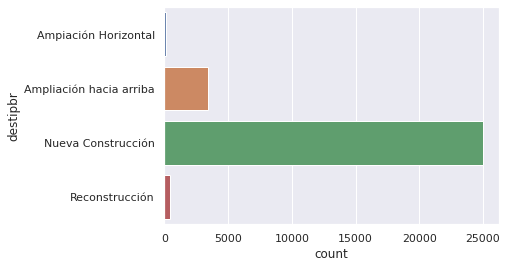

In [ ]:
sns.countplot(y='destipbr', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='descimi'>

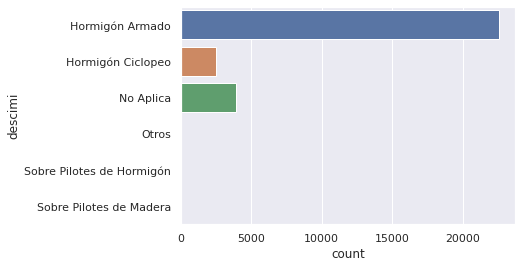

In [ ]:
sns.countplot(y='descimi', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='desestru'>

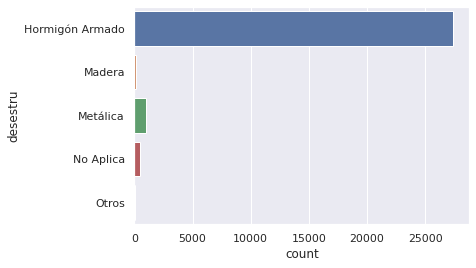

In [ ]:
sns.countplot(y='desestru', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='despared'>

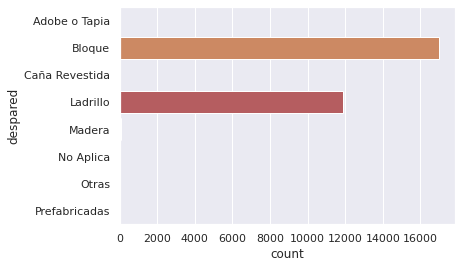

In [ ]:
sns.countplot(y='despared', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='descubi'>

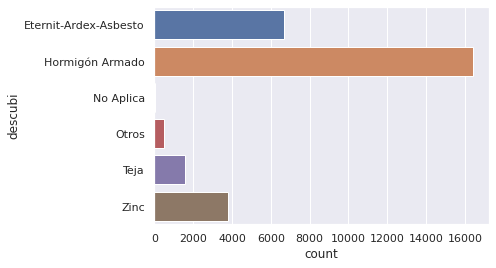

In [ ]:
sns.countplot(y='descubi', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='descres'>

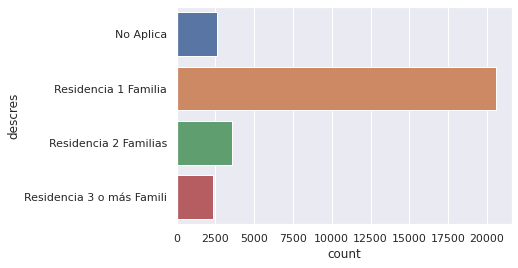

In [ ]:
sns.countplot(y='descres', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='DESCTIPOBR'>

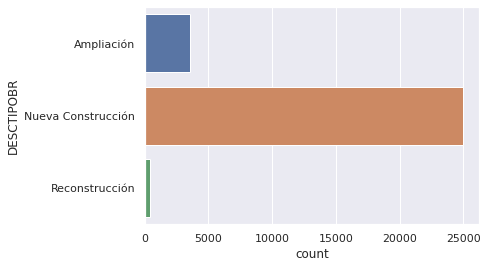

In [ ]:
sns.countplot(y='DESCTIPOBR', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='DESCDISPSUT'>

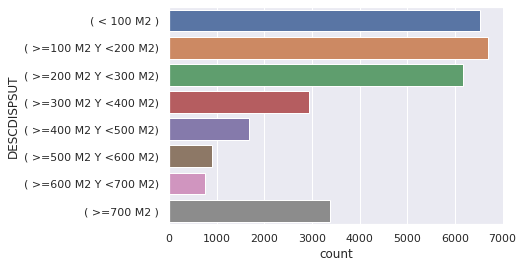

In [ ]:
sns.countplot(y='DESCDISPSUT', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='DESCDISPUSO'>

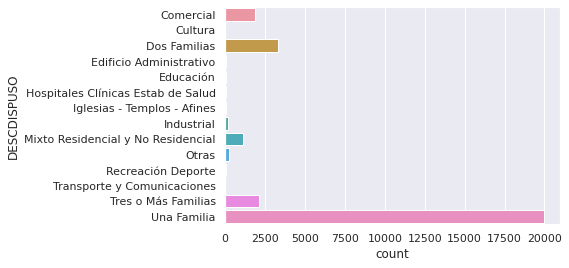

In [ ]:
sns.countplot(y='DESCDISPUSO', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='DESCDISPARC'>

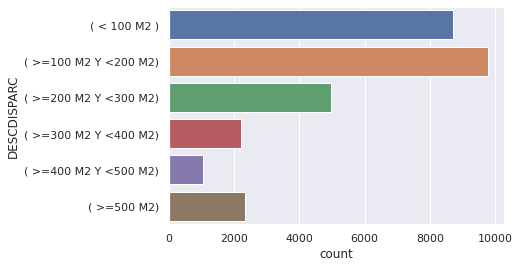

In [ ]:
sns.countplot(y='DESCDISPARC', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='DESCDISPRFI'>

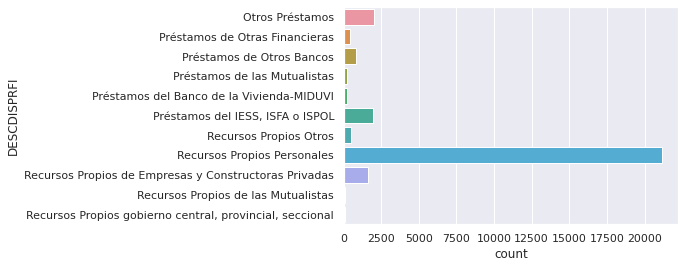

In [ ]:
sns.countplot(data=df_date_index, y='DESCDISPRFI')

<AxesSubplot:xlabel='count', ylabel='DESCDISPRFX'>

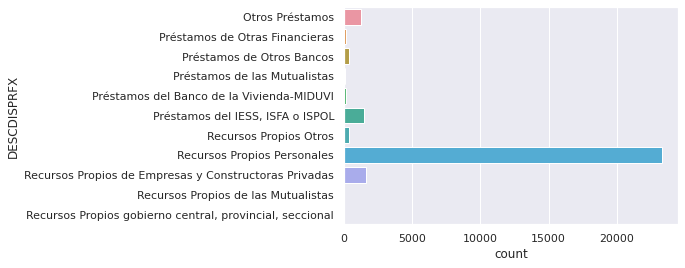

In [ ]:
sns.countplot(y='DESCDISPRFX', data=df_date_index)

<AxesSubplot:xlabel='count', ylabel='DESCAREAUR'>

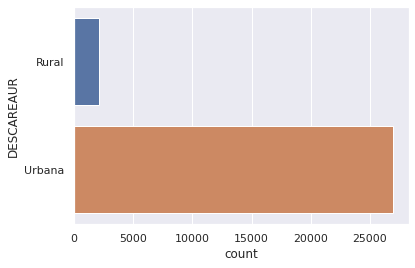

In [ ]:
sns.countplot(y='DESCAREAUR', data=df_date_index)


* Most of constructions are new and some of them are ampliations of buildings.
* Concrete structures are the most common, next goes metal (steel) but the difference is huge. There's 1 steel structures per 27 concrete structures.
* Bricks of clay and cement are widely used. The rest are practically insignificant.
* To finace a building most of people use their own resources.
* 1 family dwellings is the most common type of usage. 

Now let's focus on numerical variables. I need to understand the distribution of the data, but because of the amount of outliers, I'll use tables instead of distribution plots. 

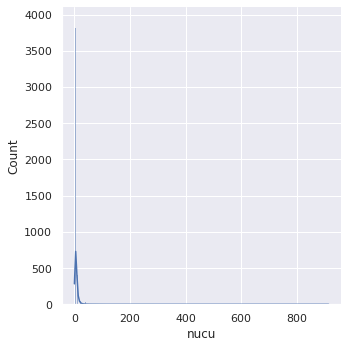

In [ ]:
sns.displot(data=df_date_index, x='nucu', kde=True)

In [ ]:
df_date_index[['nucu']].describe()

,nucu
count,"29,050.00"
mean,7.77
std,17.89
min,0.00
25%,4.00
50%,5.00
75%,8.00
max,915.00


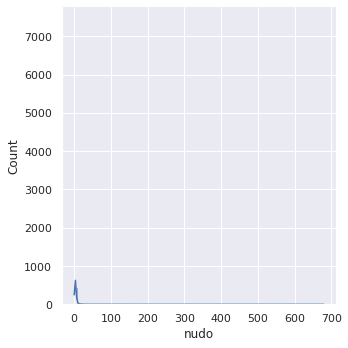

In [ ]:
sns.displot(data=df_date_index, x='nudo', kde=True)

In [ ]:
df_date_index[['nudo']].describe()

,nudo
count,"29,050.00"
mean,4.38
std,10.38
min,0.00
25%,2.00
50%,3.00
75%,4.00
max,680.00


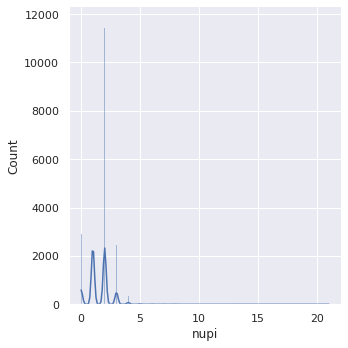

In [ ]:
sns.displot(data=df_date_index, x='nupi', kde=True)

In [ ]:
df_date_index[['nupi']].describe()

,nupi
count,"29,050.00"
mean,1.54
std,1.00
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,21.00


**Code name:**
* nupi: number of floors to be builded.
* tonp: total of floors.
* NUVICAL: dwellings per construction

In [ ]:
df_date_index[['nupi', 'tonp', 'NUVICAL']].describe()

,nupi,tonp,NUVICAL
count,"29,050.00","29,050.00","29,050.00"
mean,1.54,1.74,1.63
std,1.00,1.03,9.47
min,0.00,0.00,0.00
25%,1.00,1.00,1.00
50%,1.00,2.00,1.00
75%,2.00,2.00,1.00
max,21.00,25.00,"1,212.00"


In [ ]:
df_date_index.describe()

,mes,año,desaño,nubo,sute,arpb,arco,aesv,numuni,nuvi,...,CPERM,CDISPSUT,CDISPUSO,CDISPARC,CDISPRFX,CNUVICAL,CVAE,Quarter,Month,Day
count,"29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00",...,"29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00","29,050.00"
mean,6.56,3.00,"2,012.00",36.32,509.18,129.12,294.56,380.07,1.26,1.62,...,1.26,3.32,2.11,2.45,2.00,3.66,"106,550.18",2.52,6.56,2.13
std,3.29,0.00,0.00,51.48,"2,958.77",441.99,"1,315.92","2,753.31",5.29,9.48,...,5.29,2.23,2.70,1.48,2.54,128.90,"1,224,565.94",1.09,3.29,1.49
min,1.00,3.00,"2,012.00",1.00,0.00,0.00,3.00,0.00,1.00,0.00,...,1.00,1.00,1.00,1.00,1.00,0.00,74.00,1.00,1.00,0.00
25%,4.00,3.00,"2,012.00",4.00,108.00,42.00,88.00,22.00,1.00,1.00,...,1.00,2.00,1.00,1.00,1.00,1.00,"15,715.75",2.00,4.00,1.00
50%,7.00,3.00,"2,012.00",15.00,200.00,84.00,151.00,108.00,1.00,1.00,...,1.00,3.00,1.00,2.00,1.00,1.00,"30,275.50",3.00,7.00,2.00
75%,9.00,3.00,"2,012.00",45.00,369.00,126.00,255.00,243.00,1.00,1.00,...,1.00,4.00,2.00,3.00,1.00,1.00,"59,676.50",3.00,9.00,3.00
max,12.00,3.00,"2,012.00",348.00,"220,000.00","24,401.00","122,349.00","213,277.00",460.00,"1,212.00",...,460.00,8.00,14.00,6.00,11.00,"15,561.00","98,325,000.00",4.00,12.00,6.00


From the previous descriptive analysis of numerical values we can see:

* 75% of constructions don't have more than 2 floors.
* The maximum number of floors is 25.
* Per construction, the 75% of buildings have just 1 dwelling. 
* The maximum number of dwellings per construction is 1212. This could be a public construction. We'll analyze it later.
* 75% of dwellings have up to 3 living rooms and up to 6 rooms.
* 50% of constructions have up to 153 m² of total construction area.
* 75% of car park area is 0. But the maximum is 1365 m², it could be a mall.
* 50% of land is up to 202 m² and the area destinated to be green area is up to 110 m².
* The total value of construction is up to 30275.5 in 50% of the data and up to 59676.5 in 75% of the cases. The maximum is 98325000.

****
Later I'll analyze more about these primary insights. 

## Bivariate Analysis

Here I'll analyze the relationship between two variables, both categorical and numerical. I'll try to find answers to questions like:

* Is construction cost correlated with land area or land green area?
* Is number of floors correlated with construction cost?

<AxesSubplot:xlabel='despropie', ylabel='count'>

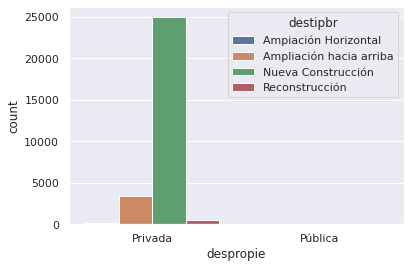

In [ ]:
#Type of property (private/public) and type of construction
sns.countplot(x='despropie', hue='destipbr' ,data=df_date_index)

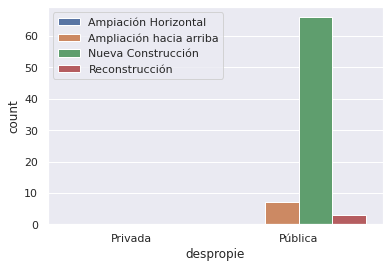

In [ ]:
#Public property and type of construction
sns.countplot(data=df_date_index[(df_date_index['despropie'] == 'Pública')], x='despropie', hue='destipbr')
plt.legend(loc='upper left')

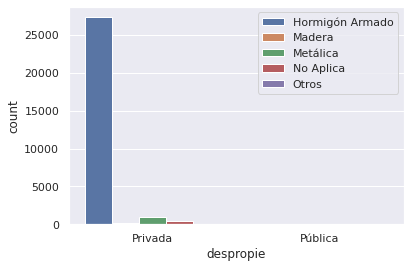

In [ ]:
#Type of property (private/public) and type of structure
sns.countplot(x='despropie', hue='desestru' ,data=df_date_index)
plt.legend(loc='upper right')

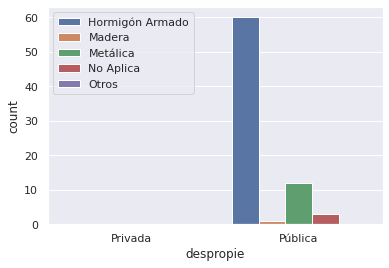

In [ ]:
#Public property and type of construction
sns.countplot(data=df_date_index[(df_date_index['despropie'] == 'Pública')], x='despropie', hue='desestru')
plt.legend(loc='upper left')

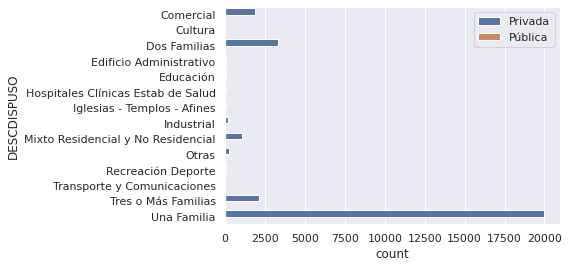

In [ ]:
#Type of property (private/public) and type of use
sns.countplot(hue='despropie', y='DESCDISPUSO' ,data=df_date_index)
plt.legend(loc='upper right')

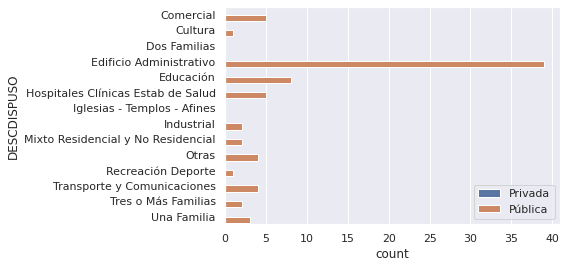

In [ ]:
#Public property and type of construction
sns.countplot(data=df_date_index[(df_date_index['despropie'] == 'Pública')], y='DESCDISPUSO', hue='despropie')
plt.legend(loc='lower right')

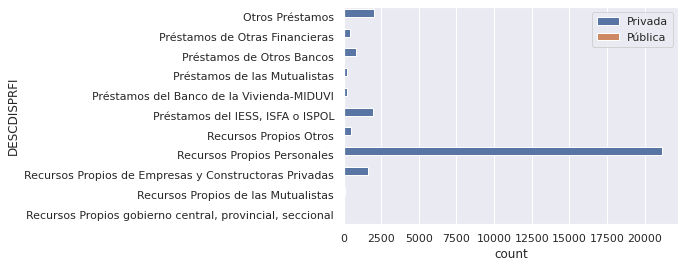

In [ ]:
#Type of property (private/public) and financing type
sns.countplot(hue='despropie', y='DESCDISPRFI' ,data=df_date_index)
plt.legend(loc='upper right')

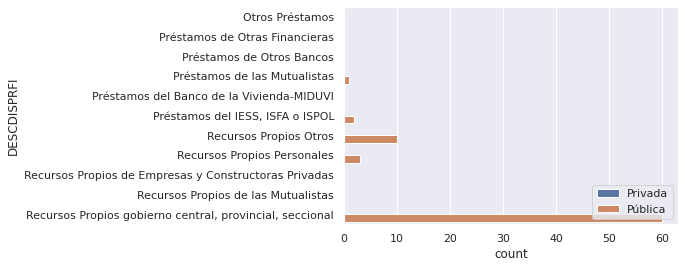

In [ ]:
#Public property and financing type 
sns.countplot(data=df_date_index[(df_date_index['despropie'] == 'Pública')], y='DESCDISPRFI', hue='despropie')
plt.legend(loc='lower right')

In [ ]:
#Quarter
df_date_index.groupby(['Quarter', 'despropie'])[['despropie']].count()

despropie
Quarter despropie           
1       Privada         6824
        Pública           13
2       Privada         6782
        Pública           16
3       Privada         8754
        Pública           19
4       Privada         6614
        Pública           28

<AxesSubplot:xlabel='Quarter,despropie'>

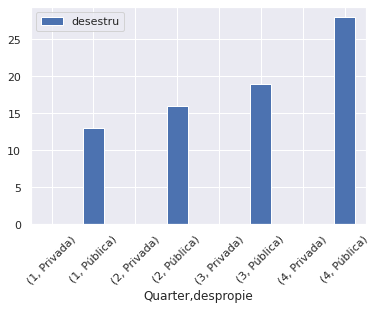

In [ ]:
df_date_index[(df_date_index['despropie'] == 'Pública')].groupby(['Quarter', 'despropie'])[['desestru']].count().plot.bar(rot=45)


Let's analyze the cost of construction per type of property.

In [ ]:
df_price = df_date_index.groupby(['despropie', 'DESCDISPUSO'])[['CVAE', 'CARCO']].sum()

In [ ]:
df_price['Price_m2'] = df_price['CVAE'] / df_price['CARCO']

In [ ]:
df_price

CVAE    CARCO  Price_m2
despropie DESCDISPUSO                                                      
Privada   Comercial                            397617050  1616197    246.02
          Cultura                                1402322     7537    186.06
          Dos Familias                         233417974   998151    233.85
          Edificio Administrativo               13695930    43885    312.09
          Educación                             53383129   189919    281.08
          Hospitales Clínicas Estab de Salud     8707495    30965    281.20
          Iglesias - Templos - Afines            6329606    27602    229.32
          Industrial                            57810164   306665    188.51
          Mixto Residencial y No Residencial   214967688   700520    306.87
          Otras                                 19969155   107491    185.78
          Recreación Deporte                     7798205    29906    260.76
          Transporte y Comunicaciones             641530     2341    274.04
          Tres o Más Familias                 1244495681  4431942    280.80
          Una Familia                          767880701  3250918    236.20
Pública   Comercial                              4776096    18430    259.15
          Cultura                                 326801      613    533.12
          Dos Familias                                 0        0       NaN
          Edificio Administrativo               18827103    41826    450.13
          Educación                              6520560    21832    298.67
          Hospitales Clínicas Estab de Salud     9766000    22058    442.74
          Iglesias - Templos - Afines                  0        0       NaN
          Industrial                             2845737     7023    405.20
          Mixto Residencial y No Residencial     7605135    44471    171.01
          Otras                                  1381936     7451    185.47
          Recreación Deporte                      116800      146    800.00
          Transporte y Comunicaciones            4148273     6261    662.56
          Tres o Más Familias                   10300000    40155    256.51
          Una Familia                             551600     3650    151.12

In [ ]:
df_price['Price_m2'] = df_price['Price_m2'].fillna(0) 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

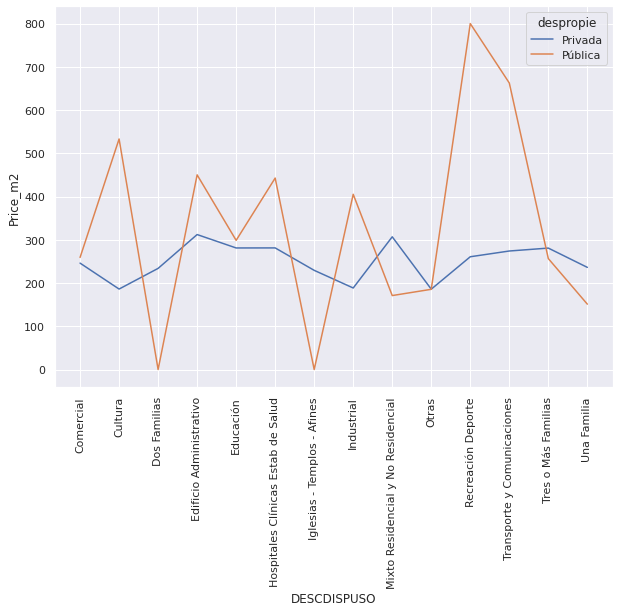

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=df_price, x='DESCDISPUSO', y='Price_m2', hue='despropie')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Comercial'),
  Text(1, 0, 'Cultura'),
  Text(2, 0, 'Dos Familias'),
  Text(3, 0, 'Edificio Administrativo'),
  Text(4, 0, 'Educación'),
  Text(5, 0, 'Hospitales Clínicas Estab de Salud'),
  Text(6, 0, 'Iglesias - Templos - Afines'),
  Text(7, 0, 'Industrial'),
  Text(8, 0, 'Mixto Residencial y No Residencial'),
  Text(9, 0, 'Otras'),
  Text(10, 0, 'Recreación Deporte'),
  Text(11, 0, 'Transporte y Comunicaciones'),
  Text(12, 0, 'Tres o Más Familias'),
  Text(13, 0, 'Una Familia')])

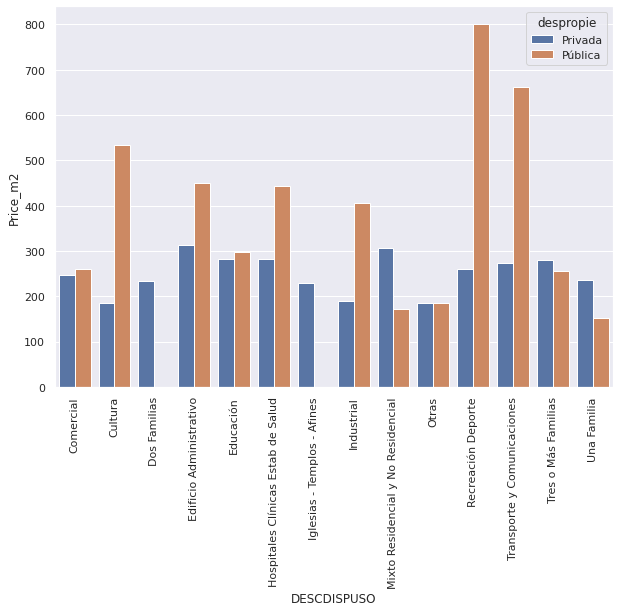

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=df_price.reset_index(), x='DESCDISPUSO', y='Price_m2', hue='despropie')
plt.xticks(rotation=90)


The bivariate categorical analysis tells us:

* Distribution of both public and private are similar.
* The ratio concrete structure/metal structure is much higher in public properties than in the private ones.

****
About the type of use: 

* We already know that the number of private properties are enormously greater than the public ones. But the distribution is not similar.

* In private properties `1 family` usage is in top 1 with a big difference respect to the second type of usage, `2 families`. The most significant types of private properties usages are: `1 family`, `2 families`, `commercial`, `3 or more families` and `mixed residential and non-residential`.

* In contrast, in public properties, `administrative building` is in the top 1 with a big difference respect to the second type of usage, `education`. Here we can see that usages such as `transportation and communications`, `health`, `sports` and `culture` are more significant than in private properties.

* None of the properties have a significant usage of `temples or churches`.

****
About financing types:

* The majority of private constructions are financed by own resources. There's a small number of constructions financed by loans. So, people tend to build with their own resources.

* Public properties are financed by the governments in the majority of cases. Loans are not common in this category.

****
About price per m² in each type of construction category:

* Public properties tend to have a higher cost per m² in each category except for `1 family`, `3 or more families` and `commercial`.

Now goes bivariate analysis of numerical variables. I'll analyze correlations between relevant numerical variables. The method used to obtain correlation coefficient is [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which formula is the following:

![Pearson Correlation Formula](https://www.gstatic.com/education/formulas2/355397047/en/correlation_coefficient_formula.svg)

In [ ]:
df_date_index['Price_m2'] =  df_date_index['CVAE'] / df_date_index['CARCO']

In [ ]:
df_date_index['Price_m2'] = df_date_index['Price_m2'].fillna(0)

In [ ]:
df_date_index['Price_m2'].describe()

count   29,050.00
mean          inf
std           NaN
min          1.00
25%        150.00
50%        202.71
75%        280.00
max           inf
Name: Price_m2, dtype: float64

<AxesSubplot:>

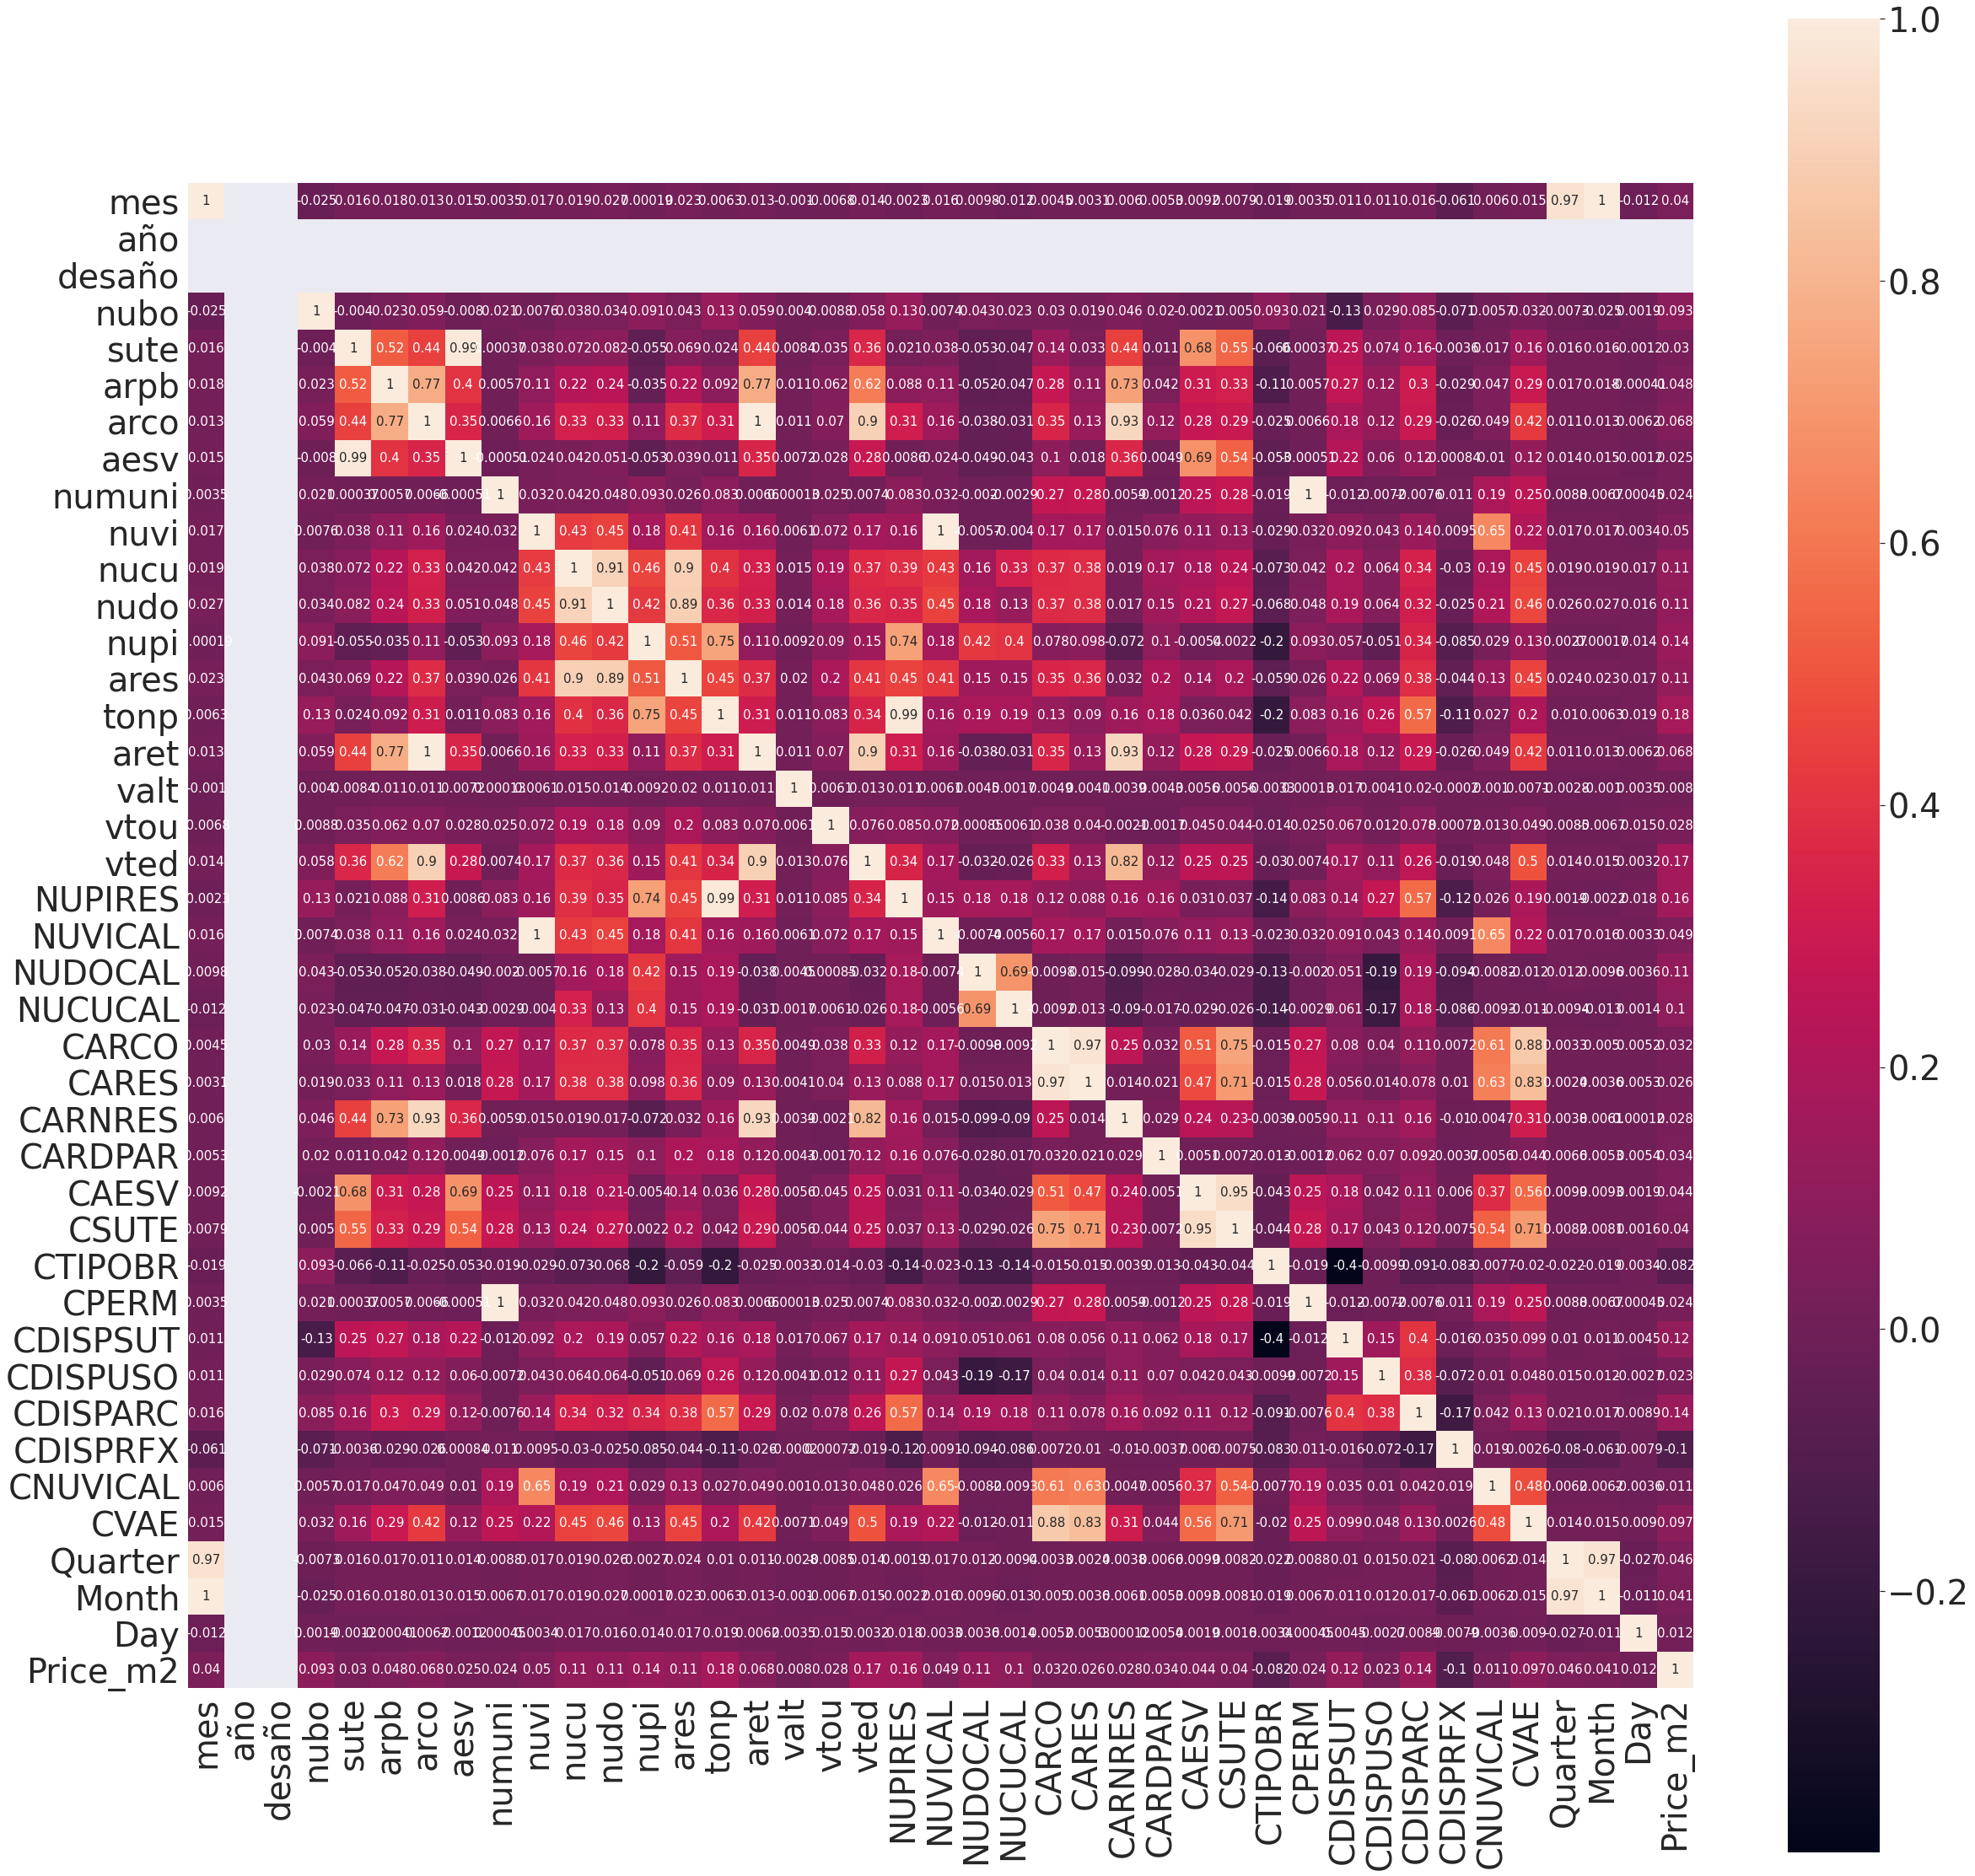

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(df_date_index.corr(), annot=True, square=True, annot_kws={"fontsize":15})


In [ ]:
df_date_index['DESCDISPRFI'].unique()

['Recursos Propios de Empresas y Constructoras ..., 'Recursos Propios Personales', 'Recursos Propios gobierno central, provincial..., 'Préstamos de Otras Financieras', 'Otros Préstamos', ..., 'Préstamos del IESS, ISFA o ISPOL', 'Recursos Propios Otros', 'Préstamos de las Mutualistas', 'Préstamos del Banco de la Vivienda-MIDUVI', 'Recursos Propios de las Mutualistas']
Length: 11
Categories (11, object): ['Recursos Propios de Empresas y Constructoras ..., 'Recursos Propios Personales', 'Recursos Propios gobierno central, provincial..., 'Préstamos de Otras Financieras', ..., 'Recursos Propios Otros', 'Préstamos de las Mutualistas', 'Préstamos del Banco de la Vivienda-MIDUVI', 'Recursos Propios de las Mutualistas']

In [ ]:
df_date_index.dtypes

desprovin        object
descodcantf      object
mes               int64
desmes           object
año               int64
desaño            int64
nubo              int64
despropie      category
destipbr       category
sute            float64
arpb              int64
arco              int64
aesv              int64
descimi        category
desestru       category
despared       category
descubi        category
descres        category
numuni          float64
nuvi              int64
nucu              int64
nudo              int64
nupi              int64
ares              int64
tonp              int64
aret              int64
valt              int64
vtou              int64
vted              int64
NUPIRES           int64
NUVICAL           int64
NUDOCAL           int64
NUCUCAL           int64
CARCO             int64
CARES             int64
CARNRES           int64
CARDPAR           int64
CAESV             int64
CSUTE             int64
CTIPOBR           int64
DESCTIPOBR     category
CPERM           

(0.0, 50.0)

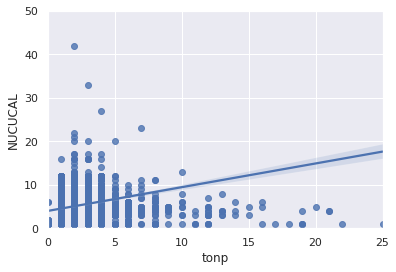

In [ ]:
#Correlation number of floors and rooms
sns.regplot(data=df_date_index, x='tonp', y='NUCUCAL')
plt.ylim(0, 50)

<AxesSubplot:xlabel='CARCO', ylabel='CAESV'>

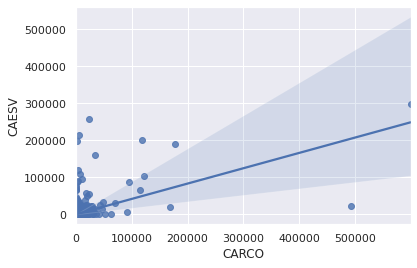

In [ ]:
#Corr construction area and green area
sns.regplot(data=df_date_index, x='CARCO', y='CAESV')

<AxesSubplot:xlabel='CSUTE', ylabel='CARCO'>

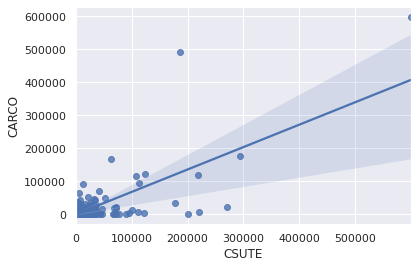

In [ ]:
#Corr land area and construction area
sns.regplot(data=df_date_index, x='CSUTE', y='CARCO')

<AxesSubplot:xlabel='CSUTE', ylabel='CAESV'>

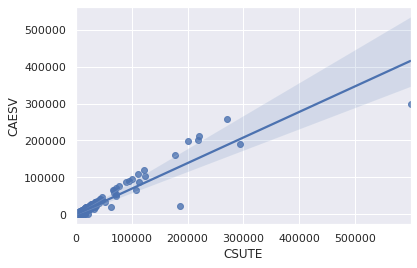

In [ ]:
#Corr land area and green area
sns.regplot(data=df_date_index, x='CSUTE', y='CAESV')

<AxesSubplot:xlabel='CARCO', ylabel='CAESV'>

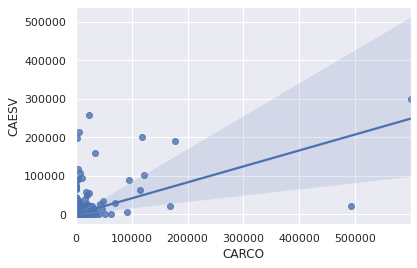

In [ ]:
#Corr construction area and green area
sns.regplot(data=df_date_index, x='CARCO', y='CAESV')

Correlations prices.

<AxesSubplot:xlabel='CARCO', ylabel='CVAE'>

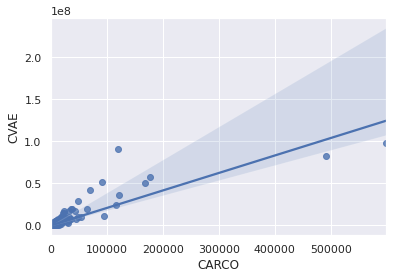

In [ ]:
#Corr construction area and total price of construction
sns.regplot(data=df_date_index, x='CARCO', y='CVAE')

<AxesSubplot:xlabel='CSUTE', ylabel='CVAE'>

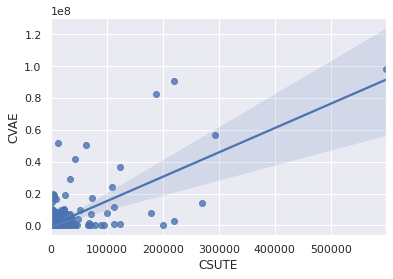

In [ ]:
#Corr land and total price of construction
sns.regplot(data=df_date_index, x='CSUTE', y='CVAE')

<AxesSubplot:xlabel='CAESV', ylabel='CVAE'>

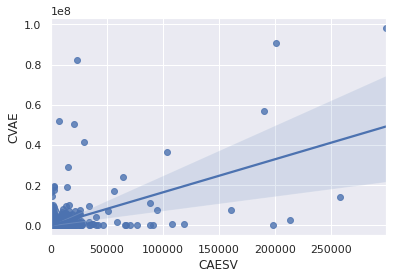

In [ ]:
#Corr green area and total price of construction
sns.regplot(data=df_date_index, x='CAESV', y='CVAE')

In general, in this section we found out a positive correlation among numerical variables. 

In [ ]:
df_date_index.dtypes

desprovin        object
descodcantf      object
mes               int64
desmes           object
año               int64
desaño            int64
nubo              int64
despropie      category
destipbr       category
sute            float64
arpb              int64
arco              int64
aesv              int64
descimi        category
desestru       category
despared       category
descubi        category
descres        category
numuni          float64
nuvi              int64
nucu              int64
nudo              int64
nupi              int64
ares              int64
tonp              int64
aret              int64
valt              int64
vtou              int64
vted              int64
NUPIRES           int64
NUVICAL           int64
NUDOCAL           int64
NUCUCAL           int64
CARCO             int64
CARES             int64
CARNRES           int64
CARDPAR           int64
CAESV             int64
CSUTE             int64
CTIPOBR           int64
DESCTIPOBR     category
CPERM           

## Multivariate Analysis

In this section I'll find insights from relationships among more than two variables.

(0.0, 50.0)

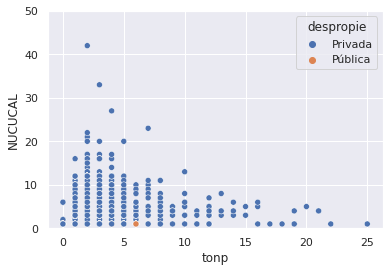

In [ ]:
#Correlation number of floors and rooms
sns.scatterplot(data=df_date_index, x='tonp', y='NUCUCAL', hue='despropie')
plt.ylim(0, 50)

<AxesSubplot:xlabel='CARCO', ylabel='CAESV'>

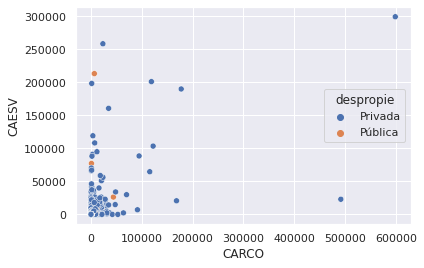

In [ ]:
#Corr construction area and green area by type of property
sns.scatterplot(data=df_date_index, x='CARCO', y='CAESV', hue='despropie')

<AxesSubplot:xlabel='CSUTE', ylabel='CARCO'>

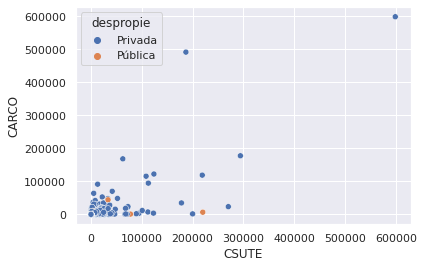

In [ ]:
#Corr land area and construction area by type of property
sns.scatterplot(data=df_date_index, x='CSUTE', y='CARCO', hue='despropie')

<AxesSubplot:xlabel='CSUTE', ylabel='CAESV'>

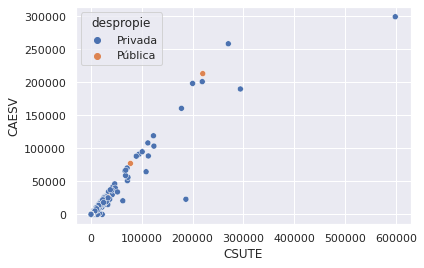

In [ ]:
#Corr land area and green area
sns.scatterplot(data=df_date_index, x='CSUTE', y='CAESV', hue='despropie')

Consider the amount of dwellings to don't misinterpretate charts.

In [ ]:
df_date_index.groupby(['despropie', 'desestru'])[['tonp']].max()

tonp
despropie desestru             
Privada   Hormigón Armado  25.0
          Madera            3.0
          Metálica         16.0
          No Aplica         3.0
          Otros             3.0
Pública   Hormigón Armado  12.0
          Madera            2.0
          Metálica         13.0
          No Aplica         4.0
          Otros             NaN

I conseder the price now.

(0.0, 15000.0)

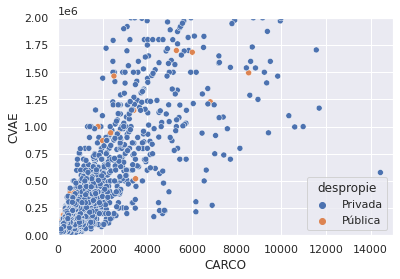

In [ ]:
#Corr construction area and total price of construction by type of property
sns.scatterplot(data=df_date_index, x='CARCO', y='CVAE', hue='despropie')
plt.ylim(0, 2000000)
plt.xlim(0, 15000)

(0.0, 15000.0)

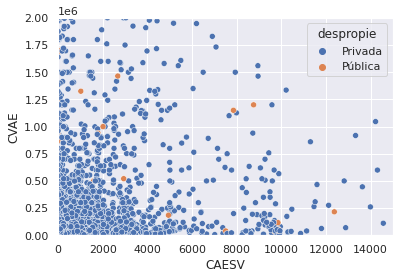

In [ ]:
#Corr green area and total price of construction by type of property
sns.scatterplot(data=df_date_index, x='CAESV', y='CVAE', hue='despropie')
plt.ylim(0, 2000000)
plt.xlim(0, 15000)

Considering the type of structure.

<AxesSubplot:xlabel='CARCO', ylabel='CVAE'>

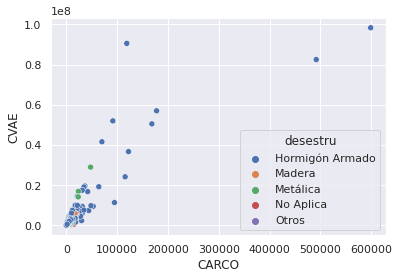

In [ ]:
#Corr construction area and total price of construction by type of structure
sns.scatterplot(data=df_date_index, x='CARCO', y='CVAE', hue='desestru')

<AxesSubplot:xlabel='CAESV', ylabel='CVAE'>

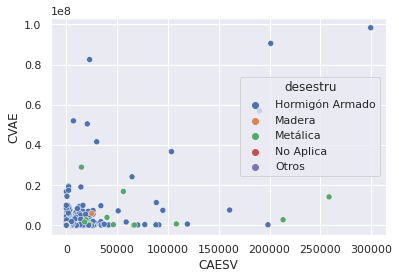

In [ ]:
#Corr green area and total price of construction by type of structure
sns.scatterplot(data=df_date_index, x='CAESV', y='CVAE', hue='desestru')

<AxesSubplot:xlabel='CARCO', ylabel='CAESV'>

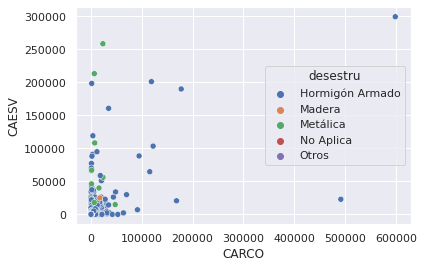

In [ ]:
#Corr construction area and green area by type of construction
sns.scatterplot(data=df_date_index, x='CARCO', y='CAESV', hue='desestru')

Multivariate analysis shows that:

* The maximum number of floors of private constructions is greater than the public maximum number of floors.
* Public constructions tend to cost more, even though they have less construction area.
* Metal structure constructions tend to cost more as well as to have more green area respect to land area.

# Conclusions and Recommendations

As I stated before, the purpose of analyzing this data was to understand the construction industry in Ecuador in the year 2012. So, here I summarize the main findings and, in the same way, I provide some recommendations. 

## Conclusions

* The construction is mainly concentrated in 5 provinces with 80.4% of the total investment in this industry. These provinces are: Pichincha, Guayas, Azuay, Imbabura and Manabi.

* 56.2% of constructions concentrate in just 5 provinces. On the other hand, the 34.7% of constructions concentrate in 5 cantons. This behaviour suggests that there are provinces in which the number of constructions are scattered throughout the province.

* Pichincha, Guayas and Azuay are fundamental in the construction industry in Ecuador. 

* Reinforced concrete structures are the most common type of structural system. The reason can be the cost: metal structures are more expensive than concrete structures.

* The most common usage for private properties is `1 family`, while the most common usage for public properties is `administrative building`. Furthermore, metal structures are more common among public properties compared to private ones. 

* Public properties tend to be more expensive. This can be because of bureaucracy and processes followed for public works. But we need more data or bibliography to validate that. Also, let's remember that metal structures are more prevalent in this type of property.

* Green area tends to make a construction more expensive.

* People like to use their own resources rather than a loan.


## Recommendations

* The data presented here is from 2012. Thus, I highly recommend analyzing data from other years and compare with this analysis.

* The reasons of higher prices in public construction can be researched in order to take actions to reduce costs. The same for metal structures.

* Finally, this is a personal project. The information presented here is real and objective and has no ulterior motives. This analysis can be used as a reference for further studies as long as the information is not misrepresented and copyright is attributed.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7486714e-3dca-42f0-bbb4-3b27fc0abd8f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>